In [1]:
from LIMxCMBL.init import *
from scipy.integrate import simpson, trapezoid
import pickle
from tqdm import tqdm, trange

from LIMxCMBL.experiments import *
import matplotlib.pyplot as plt 

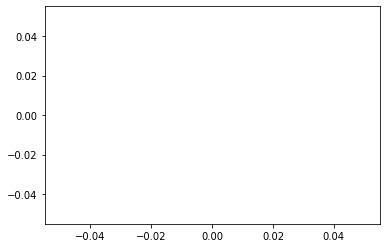

In [2]:
plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 10,
    "font.family" : "serif",
    'figure.constrained_layout.use':True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'hatch.linewidth':0.1,
    'figure.figsize': (6, 6/1.618),
    'figure.constrained_layout.use': True,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

e_colors = {
    'CHIME': '#8932B8',
    'HETDEX': '#3C44AA',
    'COMAP': '#5E7C16',
    'SPHEREx': '#F9801D',
    'CCAT-prime':'#B02E26'
}

e_order = ['CHIME',
          'HETDEX',
          'COMAP',
                      'CCAT-prime',
           'SPHEREx',
]

kpar_funds = []
for experiment in e_order:
    zmin = experiments[experiment]['zmin']
    zmax = experiments[experiment]['zmax']
    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
    
    kpar_fundamental = 2*np.pi/(chimax - chimin)
    kpar_funds += [[kpar_fundamental, experiment]]
    
kpar_funds = list(reversed(sorted(kpar_funds)))

In [3]:
import matplotlib.patheffects as pe

In [4]:
xmin = 1.25e-3


In [5]:
sval = '0.95'


In [6]:
plt_left = plt.rcParams['figure.subplot.left']
plt_right = plt.rcParams['figure.subplot.right']
plt_cntr = (plt_left + plt_right) / 2


/tmp/ipykernel_4735/629944604.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0.0)


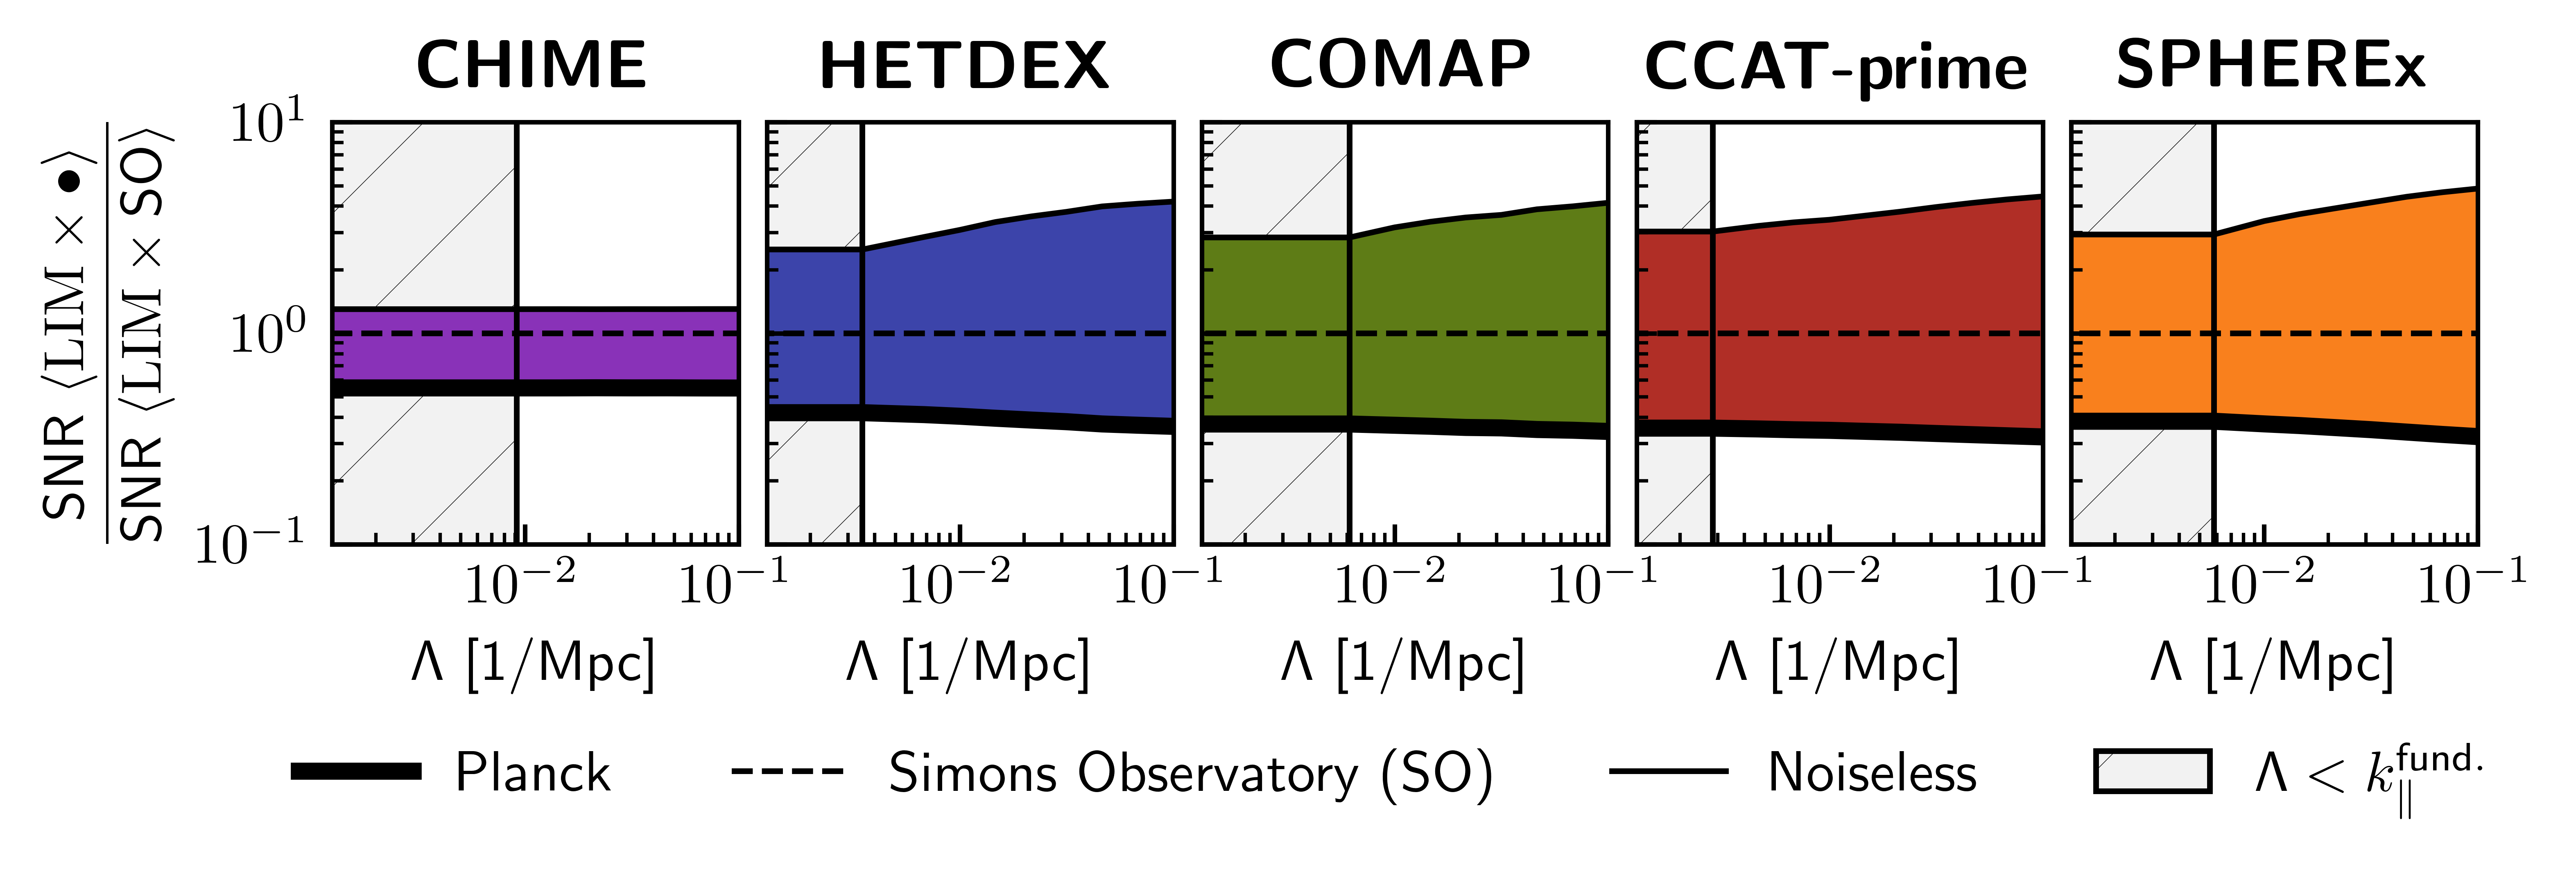

In [7]:
# fig, meta_axs = plt.subplots(nrows=1, ncols=5, 
#                              figsize = (5.5, 1.25), facecolor = 'w', dpi = 1000,
#                              sharey=True,
#                             )
# plt.tight_layout(pad = 0.0)

# for e_idx, experiment in enumerate(e_order):
#     ax = meta_axs[e_idx]
#     #metadata
#     zmin = experiments[experiment]['zmin']
#     zmax = experiments[experiment]['zmax']
#     line_str = experiments[experiment]['line_str']
    
#     Omega_field  =  np.array(experiments[experiment]['Omega_field'].to(u.rad**2)) #rad^2
#     chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
#     chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
    
#     kpar_fundamental = 2*np.pi/(chimax - chimin)

#     ell_fundamental = np.sqrt((2*np.pi)**2 / Omega_field)
#     ell_fundamental = max(np.array(ell_fundamental), 10)

#     ell_max_survey = np.sqrt((np.pi)**2 / experiments[experiment]['Omega_pix'].to(u.rad**2).value)
#     ell_max_survey = np.array(ell_max_survey)
    
# #     print(experiment, ell_fundamental, ell_max_survey)
#     c = e_colors[experiment]

#     ax.axvspan(0, kpar_fundamental, facecolor=sval, 
#                alpha=1, hatch='/',rasterized=True,
#                linewidth=0, edgecolor="k")
#     ax.axvline(kpar_fundamental, linewidth=1,color='k')


    
#     def get_SNR(N0_fname = 'so'):
#         inp_fname = '/scratch/users/delon/LIMxCMBL/SNR_011.007_N0_'+N0_fname+'_'
#         with open(inp_fname+experiment+'_full.pkl', 'rb') as f:
#             SNR2_per_mode_full = pickle.load(f)

#         _Lambdas = np.array(sorted(list(SNR2_per_mode_full.keys())))

#         #computing snr
#         SNR2_per_Omega_full = np.zeros(len(_Lambdas))
#         _idxs = np.where((ells >= ell_fundamental) & (ells <= ell_max_survey))

#         for Lambda_idx,Lambda in enumerate(_Lambdas):
#             SNR2_per_Omega_full[Lambda_idx] = trapezoid(x = np.log(ells)[_idxs], 
#                                                         y = SNR2_per_mode_full[Lambda][_idxs] 
#                                                         * ells[_idxs] ** 2 
#                                                         / 2 / np.pi)
#         SNR = np.sqrt(SNR2_per_Omega_full * Omega_field)
#         return _Lambdas, SNR
        
#     _Lambdas, SNR_SO = get_SNR(N0_fname = 'so')
#     _Lambdas, SNR_Planck = get_SNR(N0_fname = 'planck')
#     _Lambdas, SNR_Zero = get_SNR(N0_fname = 'zero')

    
#     ls_s = ['-', '--', '-']
#     lw_s = [3,1,1]
    
#     for i, _y in enumerate([SNR_Planck/SNR_SO, SNR_SO/SNR_SO, SNR_Zero/SNR_SO]):
        
        
#         _x = np.hstack(([0,kpar_fundamental], _Lambdas[1:]))
#         _y = np.hstack(([_y[0]], _y))
#         ax.plot(_x,
#                  _y,
#                  c='k', ls=ls_s[i], lw=lw_s[i],
#                 label=r'\textsf{%s}'%experiment)

#     _x = np.hstack(([0,kpar_fundamental], _Lambdas[1:]))
#     _y0 = np.hstack(([(SNR_Planck/SNR_SO)[0]], SNR_Planck/SNR_SO))
#     _y1 = np.hstack(([(SNR_Zero/SNR_SO)[0]], SNR_Zero/SNR_SO))
#     ax.fill_between(_x, _y0, _y1,
#              color=e_colors[experiment], lw=0,)
    
#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.set_xlim(xmin, 1e-1)
#     ax.set_title(r'\textsf{\textbf{%s}}'%(experiment))
#     ax.set_ylim(1e-1, 1e1)
    
#     ax.set_xlabel(r'${\sf\Lambda}$ \sf[1/Mpc]')


# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch

# legend_elements = [
#     Line2D([0], [0], color='k', lw=3, label=r'\textsf{{Planck}}'),
#     Line2D([0], [0], color='k', lw=1, ls='--', label=r'\textsf{{Simons Observatory (SO)}}'),
#     Line2D([0], [0], color='k', lw=1, ls='-', label=r'\textsf{Noiseless}'),
#     Patch(facecolor="0.95", hatch='/', edgecolor="k", lw=1, label=r'${\sf\Lambda} < k_\parallel^{\sf fund.}$')
# ]

# fig.legend(handles=legend_elements, 
#            loc='lower center',
#            bbox_to_anchor=(plt_cntr, -0.5),
#            frameon=False,
#            ncol=4)

# meta_axs[0].set_ylabel(r'$$\frac{{\sf SNR}\ {\langle {\rm LIM}\times\bullet\rangle}}{{\sf SNR}\ {\langle {\rm LIM}\times\textsf{{SO}}\rangle}}$$')


# plt.savefig('figures/011.007.compare_N0.pdf', bbox_inches='tight')

[]

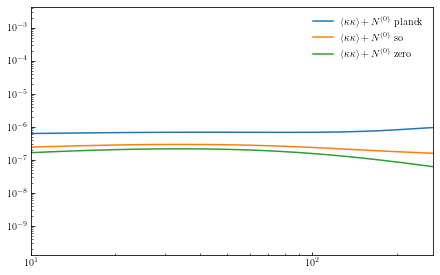

In [8]:
# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) # dimensionless
# plt.plot(ells, ClKK, c='k', label=r'$\langle \kappa\kappa\rangle$')


from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)

for nm in ['planck', 'so', 'zero']:

    with open('data/N0_%s.npy'%(nm), 'rb') as f:
        N0 = np.load(f)
    f_N0 = interp1d(x = N0_ells, y = N0)
    plt.plot(ells, ClKK+f_N0(ells), label=r'$\langle \kappa\kappa\rangle+N^{(0)}$ '+nm)


plt.xlim(10, 270)
plt.legend(frameon=False)
plt.loglog()

In [163]:
bnds = {'CHIME': [0.5, 1.8],
        'HETDEX': [0.3, 4.5],
        'COMAP': [0.3, 4.2],
        'CCAT-prime': [0.3, 4.5],
        'SPHEREx': [0.3, 4.2],
       }

In [166]:
e_colors = {
    'CHIME': '#8932B8',
    'HETDEX': '#3C44AA',
    'COMAP': '#5E7C16',
    'SPHEREx': '#B02E26',
    'CCAT-prime':'#F9801D',
}

In [169]:
# fig, meta_axs = plt.subplots(nrows=5, ncols=1, 
#                              figsize = (2.5, 4.2), facecolor = 'w', dpi = 1000,
#                              sharex=True,
#                             )
# plt.tight_layout(pad = 0.0)
# for e_idx, experiment in enumerate(e_order):
#     ax = meta_axs[e_idx]
#     #metadata
#     zmin = experiments[experiment]['zmin']
#     zmax = experiments[experiment]['zmax']
#     line_str = experiments[experiment]['line_str']
    
#     Omega_field  =  np.array(experiments[experiment]['Omega_field'].to(u.rad**2)) #rad^2
#     chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
#     chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
    
#     kpar_fundamental = 2*np.pi/(chimax - chimin)

#     ell_fundamental = np.sqrt((2*np.pi)**2 / Omega_field)
#     ell_fundamental = max(np.array(ell_fundamental), 10)

#     ell_max_survey = np.sqrt((np.pi)**2 / experiments[experiment]['Omega_pix'].to(u.rad**2).value)
#     ell_max_survey = np.array(ell_max_survey)
    
# #     print(experiment, ell_fundamental, ell_max_survey)
#     c = e_colors[experiment]

#     ax.axvspan(0, kpar_fundamental, facecolor=sval, 
#                alpha=1, hatch='/',rasterized=True,
#                zorder=-1,
#                linewidth=0, edgecolor="k")
    
#     ax.axvspan(0, kpar_fundamental, facecolor='none', 
#                alpha=1, hatch='/',rasterized=True,
#                zorder=1,
#                linewidth=0, edgecolor="k")

#     ax.axvline(kpar_fundamental, linewidth=1,color='k')


    
#     def get_SNR(N0_fname = 'so'):
#         inp_fname = '/scratch/users/delon/LIMxCMBL/SNR_011.007_N0_'+N0_fname+'_'
#         with open(inp_fname+experiment+'_full.pkl', 'rb') as f:
#             SNR2_per_mode_full = pickle.load(f)

#         _Lambdas = np.array(sorted(list(SNR2_per_mode_full.keys())))

#         #computing snr
#         SNR2_per_Omega_full = np.zeros(len(_Lambdas))
#         _idxs = np.where((ells >= ell_fundamental) & (ells <= ell_max_survey))

#         for Lambda_idx,Lambda in enumerate(_Lambdas):
#             SNR2_per_Omega_full[Lambda_idx] = trapezoid(x = np.log(ells)[_idxs], 
#                                                         y = SNR2_per_mode_full[Lambda][_idxs] 
#                                                         * ells[_idxs] ** 2 
#                                                         / 2 / np.pi)
#         SNR = np.sqrt(SNR2_per_Omega_full * Omega_field)
#         return _Lambdas, SNR
        
#     _Lambdas, SNR_SO = get_SNR(N0_fname = 'so')
#     _Lambdas, SNR_Planck = get_SNR(N0_fname = 'planck')
#     _Lambdas, SNR_Zero = get_SNR(N0_fname = 'zero')

#     print(experiment, SNR_Planck.shape, SNR_SO.shape, SNR_Zero)
#     ls_s = ['-', '--', '-']
#     lw_s = [2,1,2]
#     cl_s = ['r', 'k', 'b']
    
#     for i, _y in enumerate([SNR_Planck/SNR_SO, SNR_SO/SNR_SO, SNR_Zero/SNR_SO]):
#         _x = np.hstack(([0,kpar_fundamental], _Lambdas[1:]))
#         _y = np.hstack(([_y[0]], _y))
#         ax.plot(_x,
#                  _y,
#                 zorder=1,
#                  c=cl_s[i], ls=ls_s[i], lw=lw_s[i],
#                 label=r'\textsf{%s}'%experiment)

        
#     _x = np.hstack(([0,kpar_fundamental], _Lambdas[1:]))
#     _y0 = np.hstack(([(SNR_Planck/SNR_SO)[0]], SNR_Planck/SNR_SO))
#     _y1 = np.hstack(([(SNR_Zero/SNR_SO)[0]], SNR_Zero/SNR_SO))
# #     ax.fill_between(_x, _y0, _y1,
# #              color=e_colors[experiment], lw=0, zorder=0.0)
    
#     print(experiment, np.min(_y1), np.max(_y1))
#     print(experiment, np.min(_y0), np.max(_y0))

#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.set_xlim(xmin, 1e-1)
# #     ax.set_title(r'\textsf{\textbf{%s}}'%(experiment))
    
#     ax.text(x=1.008, y=0.5, s = r'\textsf{\textbf{%s}}'%(experiment),
#            transform=ax.transAxes,
#            rotation = -90,
#             fontsize=10,
#            verticalalignment='center')

# #     ax.set_ylim(bnds[experiment])#ax.get_ylim()[0]*np.exp(-1.1), ax.get_ylim()[1]*np.exp(1.1))
#     ax.set_ylim(1e-1, 8)
        
#     _yticks = np.hstack([bnds[experiment], [1]])
#     ax.tick_params(which='minor', axis='y', right=False, left=False, )
#     ax.tick_params(which='major', axis='y', right=True, zorder=10)
    
#     ax.set_yticklabels([], minor=True)
#     if(experiment == 'CHIME'):
#         ax.set_ylim(0.3, 2)

#     ax.set_yticks(_yticks, 
#                  labels=['%.1f'%(_yy) for _yy in _yticks])

# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch

# legend_elements = [
#     Line2D([0], [0], color='r', lw=2, label=r'\textsf{{Planck}}'),
#     Line2D([0], [0], color='k', lw=1, ls='--', label=r'\textsf{{SO}}'),
#     Line2D([0], [0], color='b', lw=2, ls='-', label=r'\textsf{Noiseless}'),
# ]


# plt.xlabel(r'${\sf\Lambda}$ \sf[Mpc${}^{-1}$]')

# fig.legend(handles=legend_elements, 
#            loc='lower center',
#            bbox_to_anchor=(plt_cntr, -0.13),
#            frameon=False,
#            ncol=3)

# meta_axs[2].set_ylabel(r'$$\frac{\textsf{\textbf{{SNR}}}\ {\langle{\rm LIM}\times\bullet\rangle}}{\textsf{\textbf{{SNR}}}\ {\langle {\rm LIM}\times\textsf{{SO}}\rangle}}$$')


# meta_axs[0].set_title(r'\textsf{\textbf{Comparing Detectability} of}'+'\n'+r'$\langle$LIM$\times$({\sf Planck}/\textsf{{{SO}}}/{\sf Noiseless})$\rangle$', fontsize=10)
# # plt.subplots_adjust(wspace=0, hspace=0)


# plt.savefig('figures/011.007.compare_N0.pdf', bbox_inches='tight')

In [182]:
xmin = Lambdas[14]

/tmp/ipykernel_4735/1403361258.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0.0)


CHIME (7,) (7,) (7,)
CHIME 1.300033700989668 1.3025238336407137
CHIME 0.5500144805807611 0.5515520855169491
HETDEX (9,) (9,) (9,)
HETDEX 2.494359231414191 4.206694474674067
HETDEX 0.36193925737744126 0.4202001044791225
COMAP (8,) (8,) (8,)
COMAP 2.844599061294124 4.151475199047533
COMAP 0.3424835137310566 0.3713518014841467
CCAT-prime (10,) (10,) (10,)
CCAT-prime 3.0336511495390193 4.450140214958999
CCAT-prime 0.3226170300196889 0.3549948699344792
SPHEREx (8,) (8,) (8,)
SPHEREx 3.054282761610802 3.9427132863555387
SPHEREx 0.3588793449250105 0.3816054899371311


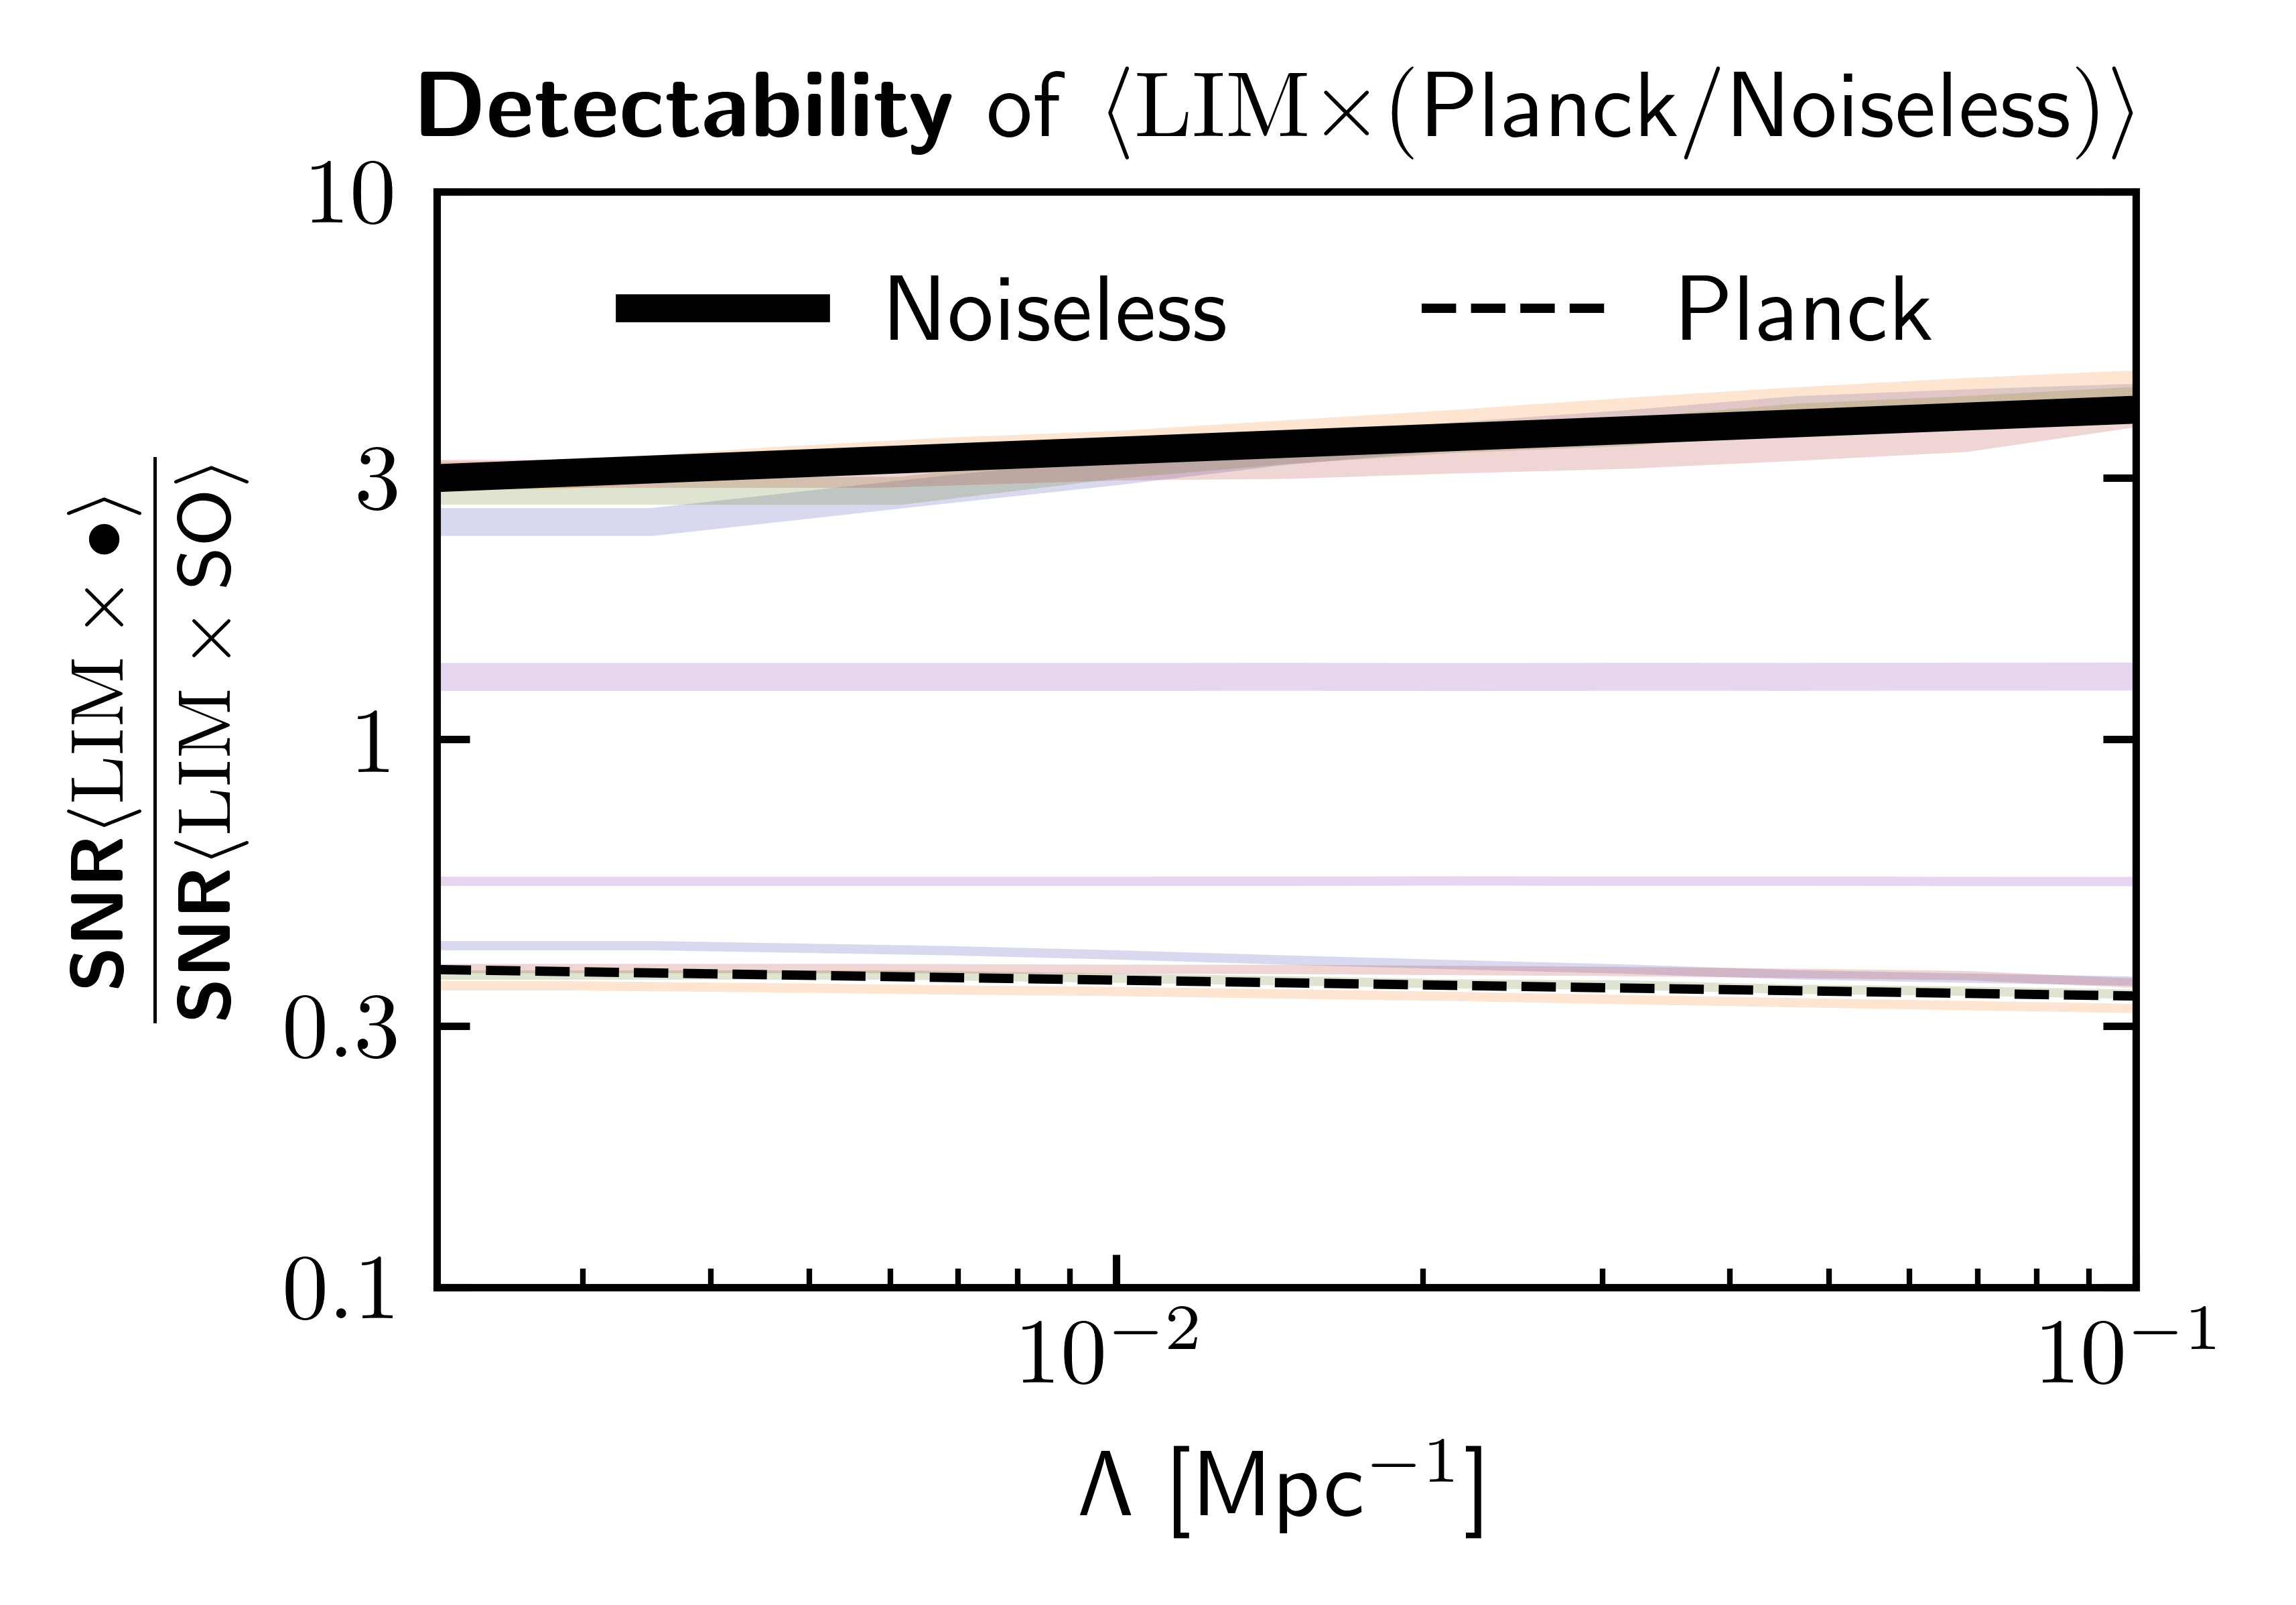

In [266]:
fig, ax = plt.subplots(nrows=1, ncols=1, 
                             figsize = (2.85, 3/1.618), facecolor = 'w', dpi = 1000,
                             sharex=True,
                            )
plt.tight_layout(pad = 0.0)
for e_idx, experiment in enumerate(e_order):
    #metadata
    zmin = experiments[experiment]['zmin']
    zmax = experiments[experiment]['zmax']
    line_str = experiments[experiment]['line_str']
    
    Omega_field  =  np.array(experiments[experiment]['Omega_field'].to(u.rad**2)) #rad^2
    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
    
    kpar_fundamental = 2*np.pi/(chimax - chimin)

    ell_fundamental = np.sqrt((2*np.pi)**2 / Omega_field)
    ell_fundamental = max(np.array(ell_fundamental), 10)

    ell_max_survey = np.sqrt((np.pi)**2 / experiments[experiment]['Omega_pix'].to(u.rad**2).value)
    ell_max_survey = np.array(ell_max_survey)
    
#     print(experiment, ell_fundamental, ell_max_survey)
    c = e_colors[experiment]

#     ax.axvspan(0, kpar_fundamental, facecolor=sval, 
#                alpha=1, hatch='/',rasterized=True,
#                zorder=-1,
#                linewidth=0, edgecolor="k")
    
#     ax.axvspan(0, kpar_fundamental, facecolor='none', 
#                alpha=1, hatch='/',rasterized=True,
#                zorder=1,
#                linewidth=0, edgecolor="k")

#     ax.axvline(kpar_fundamental, linewidth=1,color='k')


    
    def get_SNR(N0_fname = 'so'):
        inp_fname = '/scratch/users/delon/LIMxCMBL/SNR_011.007_N0_'+N0_fname+'_'
        with open(inp_fname+experiment+'_full.pkl', 'rb') as f:
            SNR2_per_mode_full = pickle.load(f)

        _Lambdas = np.array(sorted(list(SNR2_per_mode_full.keys())))

        #computing snr
        SNR2_per_Omega_full = np.zeros(len(_Lambdas))
        _idxs = np.where((ells >= ell_fundamental) & (ells <= ell_max_survey))

        for Lambda_idx,Lambda in enumerate(_Lambdas):
            SNR2_per_Omega_full[Lambda_idx] = trapezoid(x = np.log(ells)[_idxs], 
                                                        y = SNR2_per_mode_full[Lambda][_idxs] 
                                                        * ells[_idxs] ** 2 
                                                        / 2 / np.pi)
        SNR = np.sqrt(SNR2_per_Omega_full * Omega_field)
        return _Lambdas, SNR
        
    _Lambdas, SNR_SO = get_SNR(N0_fname = 'so')
    _Lambdas, SNR_Planck = get_SNR(N0_fname = 'planck')
    _Lambdas, SNR_Zero = get_SNR(N0_fname = 'zero')

    print(experiment, SNR_Planck.shape, SNR_SO.shape, SNR_Zero.shape)
    ls_s = ['-', '-']
    lw_s = [1,3]
    cl_s = [c, c]
    
    for i, _y in enumerate([SNR_Planck/SNR_SO, SNR_Zero/SNR_SO]):
        _x = np.hstack(([0,kpar_fundamental], _Lambdas[1:]))
        _y = np.hstack(([_y[0]], _y))
        ax.plot(_x,
                 _y,
                zorder=1,
                alpha=0.2,
                 c=cl_s[i], ls=ls_s[i], lw=lw_s[i],)
        
    _x = np.hstack(([0,kpar_fundamental], _Lambdas[1:]))
    _y0 = np.hstack(([(SNR_Planck/SNR_SO)[0]], SNR_Planck/SNR_SO))
    _y1 = np.hstack(([(SNR_Zero/SNR_SO)[0]], SNR_Zero/SNR_SO))
#     ax.fill_between(_x, _y0, _y1,
#              color=e_colors[experiment], lw=0, zorder=0.0)
    
    print(experiment, np.min(_y1), np.max(_y1))
    print(experiment, np.min(_y0), np.max(_y0))

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(xmin, 1e-1)
#     ax.set_title(r'\textsf{\textbf{%s}}'%(experiment))
    
#     ax.text(x=1.008, y=0.5, s = r'\textsf{\textbf{%s}}'%(experiment),
#            transform=ax.transAxes,
#            rotation = -90,
#             fontsize=10,
#            verticalalignment='center')

#     ax.set_ylim(bnds[experiment])#ax.get_ylim()[0]*np.exp(-1.1), ax.get_ylim()[1]*np.exp(1.1))
    ax.set_ylim(1e-1, 8)
        
    _yticks = np.hstack([bnds[experiment], [1]])
    ax.tick_params(which='minor', axis='y', right=False, left=False, )
    ax.tick_params(which='major', axis='y', right=True, zorder=10)
    
    ax.set_yticklabels([], minor=True)
#     if(experiment == 'CHIME'):
#         ax.set_ylim(0.3, 2)

#     ax.set_yticks(_yticks, 
#                  labels=['%.1f'%(_yy) for _yy in _yticks])

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

plt.xlabel(r'${\sf\Lambda}$ \sf[Mpc${}^{-1}$]')


ax.set_ylabel(r'$$\frac{\textsf{\textbf{{SNR}}}{\langle{\rm LIM}\times\bullet\rangle}}{\textsf{\textbf{{SNR}}}{\langle {\rm LIM}\times\textsf{{SO}}\rangle}}$$', 
              fontsize=8)


ax.set_title(r'\textsf{\textbf{Detectability} of} $\langle$LIM$\times$({\sf Planck}/{\sf Noiseless})$\rangle$', fontsize=10)
# plt.subplots_adjust(wspace=0, hspace=0)

plt.plot([xmin, 1e-1, ], [3, 4], c='k', lw=3, label='{\sf Noiseless}')
plt.plot([xmin, 1e-1, ], [.38,.34], c='k', lw=1, ls='--', label='{\sf Planck}')

ax.set_yticks([1e-1, 0.3, 1e0, 3, 1e1], ['0.1','0.3', '1', '3', '10'])
plt.legend(frameon=False, ncols=2, loc='upper center')

plt.savefig('figures/011.007.compare_N0.pdf', bbox_inches='tight')